# 236756 - Machine Learning - Exercise 3
## Ron Sailer - 313341596
## Adam Erdreich - 302325709


## Bonuses we've done (Please read this!):

---

#### Widrow-Hoff implementation is in HW03_Bonus_Triplets.ipynb
#### Feature Manipulation is at the end of this notebook, and in HW3_fourth_pred.ipynb

* Automated the model selection
* One size fits all - tried different measurements to find the best classifier for the distribution of votes, rather than just measure accuracy (Because I could have two parties of equal size, and have a classifier with 0% accuracy which labels each voter as a voter of the other party, but a distribution accuracy of 100%, and we want to find that!)

* Identify the factor (voters’ characteristic) which by manipulating you are most likely to change which party will win the elections.

* Widrow-Hoff implementation (in the other .ipynb file)

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter
from itertools import combinations

from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, scale, FunctionTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


#classifiers
from sklearn.linear_model import Perceptron
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import IsolationForest, RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

pd.set_option('display.max_columns', 100) # to display all columns at all time
pd.options.mode.chained_assignment = None # to ignore false-positive warnings about chained assignments


In [2]:
data = pd.read_csv('ElectionsData.csv',header=0)
train = pd.read_csv('modified/afterpp_train.csv', header=0)
test = pd.read_csv('modified/afterpp_test.csv', header=0)
validation = pd.read_csv('modified/afterpp_validation.csv',header=0)

# merged train and test
train_test = pd.concat([train, test], keys=['train', 'test'])

for df in [train,test,validation,train_test]:
    df.drop([x for x in df.columns.values if 'Unnamed' in x],axis=1,inplace=True)

In [6]:
validation.shape[0]

2000

## Training different models

In [3]:
train_data = train.drop(['Vote'],axis=1)
train_data_labels = train['Vote']

X_train, X_test, Y_train, Y_test = train_test_split(train_data,train_data_labels)


test_data = test.drop(['Vote'],axis=1)
test_labels = test['Vote']

def print_metrics(clf):
    clf.fit(X_train, Y_train)
    test_pred = clf.predict(X_test)
    print "accuracy:", metrics.accuracy_score(Y_test, test_pred)
    print "precision:", metrics.precision_score(Y_test, test_pred,average='weighted')
    print "recall:", metrics.recall_score(Y_test, test_pred,average='macro')
    print "f1 score:", metrics.f1_score(Y_test, test_pred,average='weighted')
    return test_pred

In [4]:
train_data

,Yearly_ExpensesK,Yearly_IncomeK,Overall_happiness_score,Avg_Residancy_Altitude,Most_Important_Issue_Education,Most_Important_Issue_Environment,Most_Important_Issue_Financial,Most_Important_Issue_Foreign_Affairs,Most_Important_Issue_Healthcare,Most_Important_Issue_Military,Most_Important_Issue_Other,Most_Important_Issue_Social,Will_vote_only_large_party,Financial_agenda_matters
0,0.688225,0.687757,0.688560,0.580132,0,0,0,0,0,0,1,0,1.0,1.0
1,0.677262,0.685288,0.683000,0.578213,0,0,0,1,0,0,0,0,1.0,1.0
2,0.609747,0.638948,0.644165,0.514479,0,0,0,0,0,0,0,1,1.0,0.0
3,0.625241,0.644655,0.675658,0.564170,0,1,0,0,0,0,0,0,1.0,0.0
4,0.618274,0.651110,0.656188,0.577447,0,0,0,0,1,0,0,0,1.0,0.0
5,0.664133,0.671524,0.649632,0.539463,0,0,0,0,1,0,0,0,1.0,0.0
6,0.642674,0.645308,0.650188,0.564044,0,1,0,0,0,0,0,0,1.0,0.0
7,0.598613,0.637870,0.640305,0.607938,0,0,0,0,0,0,0,1,1.0,0.0
8,0.639826,0.648233,0.650645,0.520176,1,0,0,0,0,0,0,0,1.0,0.0
9,0.596557,0.635745,0.649901,0.588606,0,0,1,0,0,0,0,0,1.0,0.0


### Random Forest

In [5]:
forest = RandomForestClassifier(n_estimators = 60,criterion='gini',n_jobs=-1,random_state=1)
test_pred = print_metrics(forest)

accuracy: 0.860666666667
precision: 0.862053321011
recall: 0.895596183223
f1 score: 0.86105384932


### Decision Trees

In [6]:
tree = DecisionTreeClassifier(random_state=1)
test_pred = print_metrics(tree)

accuracy: 0.817333333333
precision: 0.818131515336
recall: 0.853461531478
f1 score: 0.817287883319


### Neural Network

Note: This may return a warning because a class is empty (no instances were classified as that class)

In [8]:
nerual_network = MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,2), random_state=1)
test_pred = print_metrics(nerual_network)

accuracy: 0.415333333333
precision: 0.208553034138
recall: 0.39
f1 score: 0.264112971497


### KNN

In [9]:
nbrs = KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree')
test_pred = print_metrics(nbrs)

accuracy: 0.779333333333
precision: 0.797763600971
recall: 0.851605387508
f1 score: 0.783002287159


### RBF SVM

patience.. this runs for about 20-30 seconds

In [10]:
svm = SVC(gamma=5, C=1000000)
test_pred = print_metrics(svm)

accuracy: 0.853333333333
precision: 0.860997512179
recall: 0.91002933225
f1 score: 0.85538636803


### Perceptron

In [11]:
perc = Perceptron(n_iter=6)
test_pred = print_metrics(perc)

accuracy: 0.343333333333
precision: 0.266951461223
recall: 0.545447210832
f1 score: 0.28539791409


### Gaussian Process

Doesn't work because of overflows

In [12]:
#gaussian = GaussianProcessClassifier(1.0 * RBF(1.0))
#print_metrics(gaussian)

## Model Selection (Automatic)

We've built a function to run each classifier and then select the best one, based on the f1 score because that takes into account unbalanced classes.

Spoiler: it's either the Random Forest or the RBF (Radial Based Function) SVM that wins

In [39]:
def pick_best_classifier(classifiers, names, df,number_of_iterations=1):
    data = df.drop(['Vote'],axis=1)
    data_labels = df['Vote']
 
    best_score = -1
    best_clf = None
    best_clf_name = None

    for i in range(number_of_iterations):
        if number_of_iterations > 1:
            print "iteration:",i+1
            
        X_train, X_test, Y_train, Y_test = train_test_split(data,data_labels)

        for name, clf in zip(names, classifiers):
            print "current classifier:", name
            clf.fit(X_train, Y_train)
            prediction = clf.predict(X_test)
            score = metrics.f1_score(Y_test, prediction, average='weighted')
            print name, "f1 score:", score
            if score > best_score:
                best_clf = clf
                best_score = score
                best_clf_name = name
        print ""
    print "Best classifier:", best_clf_name, "with score:", best_score
    return best_clf
    
    
#try them all!!! our classifiers, with our parameters are in there
#but since this is automatic, let's just try them all and let the best one win!
classifiers = [
    KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree'),
    SVC(kernel="linear", C=1000000),
    SVC(gamma=5, C=1000000),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators = 60,criterion='gini',n_jobs=-1),
    MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,2)),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    Perceptron()]

names = ["Nearest Neighbors",
         "Linear SVM",
         "RBF SVM",
         "Decision Tree",
         "Random Forest",
         "Neural Net",
         "AdaBoost",
         "Naive Bayes",
         "QDA",
         "LDA",
         "Perceptron"]

clf = pick_best_classifier(classifiers, names, train, 3)

iteration: 1
current classifier: Nearest Neighbors
Nearest Neighbors f1 score: 0.799170205842
current classifier: Linear SVM
Linear SVM f1 score: 0.615429565418
current classifier: RBF SVM
RBF SVM f1 score: 0.861879997388
current classifier: Decision Tree
Decision Tree f1 score: 0.667837883074
current classifier: Random Forest
Random Forest f1 score: 0.872220172893
current classifier: Neural Net
Neural Net f1 score: 0.260619685577
current classifier: AdaBoost
AdaBoost f1 score: 0.228443161612
current classifier: Naive Bayes
Naive Bayes f1 score: 0.61089401769
current classifier: QDA
QDA f1 score: 0.043115716753
current classifier: LDA
LDA f1 score: 0.313925813217
current classifier: Perceptron
Perceptron f1 score: 0.133749715974

iteration: 2
current classifier: Nearest Neighbors
Nearest Neighbors f1 score: 0.790423797103
current classifier: Linear SVM
Linear SVM f1 score: 0.617729522924
current classifier: RBF SVM
RBF SVM f1 score: 0.870154105471
current classifier: Decision Tree
Deci

## Predict the majority of votes

In [14]:
#Fit to the training set and predict on the test set
train_data = train.drop(['Vote'],axis=1)
train_data_labels = train['Vote']

test_data = test.drop(['Vote'],axis=1)
test_labels = test['Vote']

clf.fit(train_data, train_data_labels)
predictions = clf.predict(test_data)

print "f1 score:", metrics.f1_score(test_labels, predictions, average='weighted')

f1 score: 0.865725389059


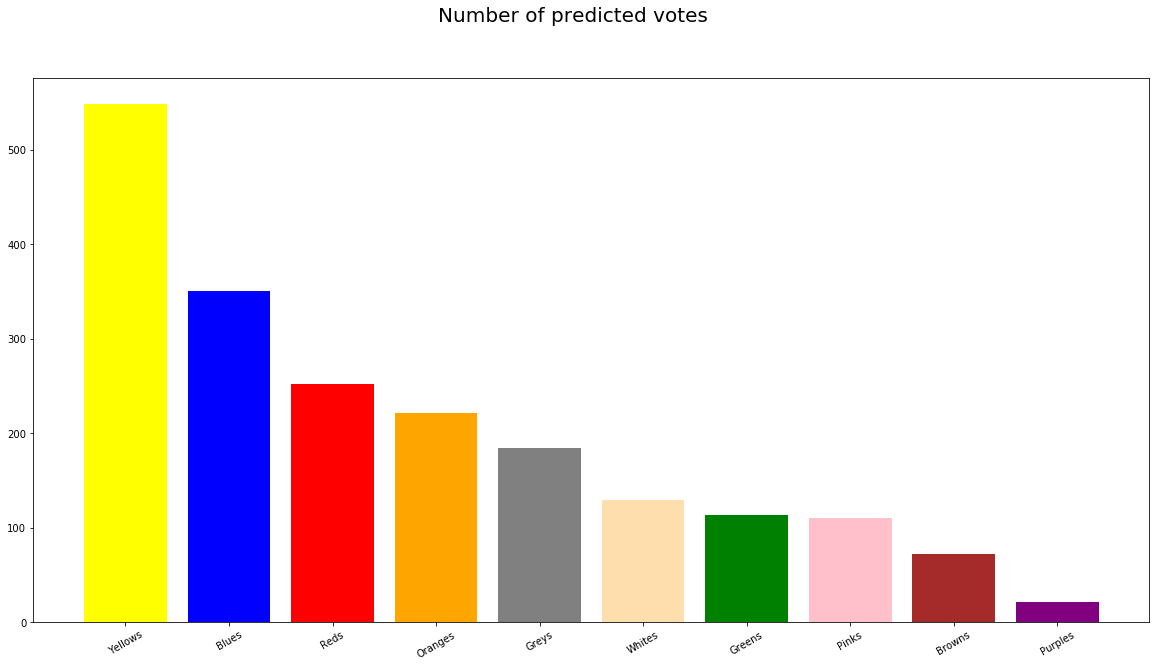

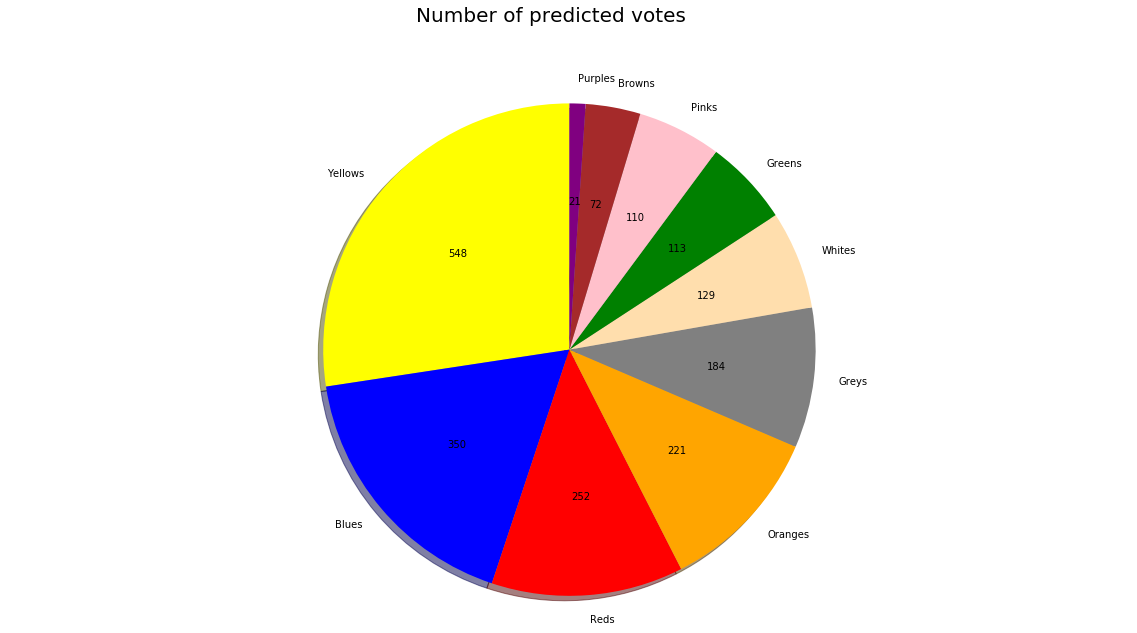

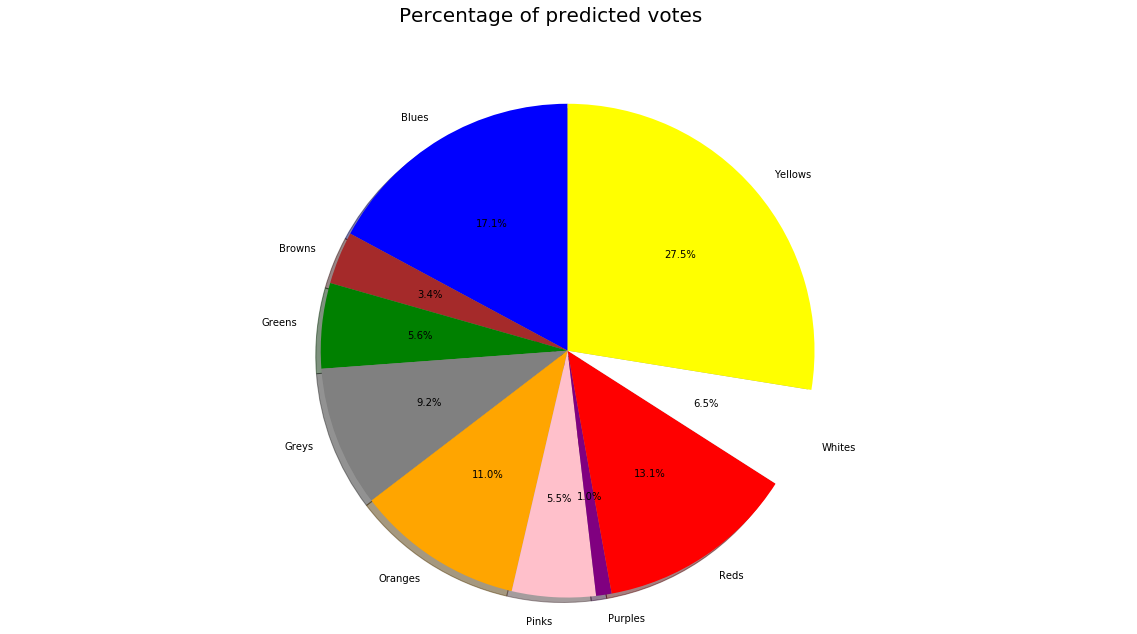

In [15]:
c = Counter()
for i in range(len(predictions)):
    c[predictions[i]] += 1
    
c = c.most_common()
parties, votes = zip(*[x for x in c])

colors = [x[:-1] if x != 'Whites' else 'navajowhite' for x in parties]

f, ax = plt.subplots(figsize=(20, 10))
f.suptitle('Number of predicted votes',fontsize=20)
ax.bar(range(len(c)), [x[1] for x in c], align="center",color=colors)
plt.xticks(range(len(c)), parties, rotation=30)

fig1, ax1 = plt.subplots(figsize=(20, 10))
ax1.pie([x[1] for x in c], labels=parties, colors=colors, autopct=lambda(p): '{:.0f}'.format(p * predictions.size / 100),
        shadow=True, startangle=90)
ax1.axis('equal')
fig1.suptitle('Number of predicted votes',fontsize=20)

if hasattr(clf, 'predict_proba'):
    ratios = [i/test_data.shape[0] for i in [sum(i) for i in zip(*clf.predict_proba(test_data))]]
    fig2, ax2 = plt.subplots(figsize=(20, 10))
    ax2.pie(ratios, labels=clf.classes_, colors=[x[:-1] for x in clf.classes_], autopct='%1.1f%%',
            shadow=True, startangle=90)
    ax2.axis('equal')
    fig2.suptitle('Percentage of predicted votes',fontsize=20)

plt.show()


## Confusion Matrix

In [16]:
pd.DataFrame(confusion_matrix(test_labels, predictions, labels=parties), columns=parties, index=parties)

,Yellows,Blues,Reds,Oranges,Greys,Whites,Greens,Pinks,Browns,Purples
Yellows,470,52,4,11,13,0,0,0,0,0
Blues,58,259,24,0,0,0,0,0,0,0
Reds,1,39,224,0,2,0,0,0,0,0
Oranges,10,0,0,196,10,0,0,0,0,0
Greys,9,0,0,14,159,0,0,0,0,0
Whites,0,0,0,0,0,117,4,3,0,0
Greens,0,0,0,0,0,8,108,2,0,0
Pinks,0,0,0,0,0,4,1,105,0,0
Browns,0,0,0,0,0,0,0,0,72,0
Purples,0,0,0,0,0,0,0,0,0,21


## Hmm... This is interesting...

Yellows, Blues, Reds, Oranges are exclusively confused with one-another.
The same goes for Greys, Whites and Greens

Let's try something out: Let's train a classifier for each of these "clusters" and maybe achieve better results.

Results: We've tried running different classifiers on the different "clusters", such as {Browns, Purples}, {Whites, Greens, Pinks} and {Yellows, Blues, Reds, Oranges, Greys} and our best **mix** of models (pick the best performing classifier for each cluster) got a 100%, 98% and 84% accuracy respectively on the clusters.

We thought, maybe if we "clustered" those parties and then built a classifier to predict to which cluster someone belongs to, and then run a classifier for each cluster, we'd achieve better results.

The problem is that with a weighted average, those 100%, 98% and 84% are as good as running the original classifier, and that means that even if we got a 100% accuracy on identifying the cluster, we're no better than just running a simple model. 

So we abandoned this idea.. But hey, it was worth a try.

# List of most probable voters

In [17]:
party_to_voters = {}

for party in clf.classes_:
    party_to_voters[party] = test_data.iloc[np.where(predictions == party)[0]]

party_to_voters will hold for each party, the people that the classifier predicted will vote to that party.

For example:

In [18]:
party_to_voters['Purples']

,Yearly_ExpensesK,Yearly_IncomeK,Overall_happiness_score,Avg_Residancy_Altitude,Most_Important_Issue_Education,Most_Important_Issue_Environment,Most_Important_Issue_Financial,Most_Important_Issue_Foreign_Affairs,Most_Important_Issue_Healthcare,Most_Important_Issue_Military,Most_Important_Issue_Other,Most_Important_Issue_Social,Will_vote_only_large_party,Financial_agenda_matters
82,0.570116,0.634467,0.627767,0.620535,0,1,0,0,0,0,0,0,0.0,1.0
107,0.651670,0.630492,0.671758,0.495996,0,1,0,0,0,0,0,0,0.0,1.0
421,0.643384,0.616853,0.640399,0.598864,0,1,0,0,0,0,0,0,0.0,1.0
480,0.645620,0.654076,0.672012,0.513024,0,0,1,0,0,0,0,0,0.0,1.0
486,0.582182,0.654590,0.635036,0.498721,0,1,0,0,0,0,0,0,0.0,1.0
632,0.649385,0.653646,0.669682,0.609052,1,0,0,0,0,0,0,0,0.0,1.0
668,0.648926,0.654284,0.667834,0.598109,1,0,0,0,0,0,0,0,0.0,1.0
866,0.656762,0.652869,0.629453,0.465648,0,0,1,0,0,0,0,0,0.0,1.0
1256,0.637761,0.658124,0.639904,0.471634,1,0,0,0,0,0,0,0,0.0,1.0
1352,0.585254,0.661595,0.621451,0.603672,0,0,0,0,0,0,0,1,0.0,1.0


# Factor Manipulating to change Election Results

### Things we've thought about testing:
* Looking at the Perceptron weights, which give an indication about which features are more valuable than others.
* Looking at the Random Forest trees, or Decision Tree splits, where we assume the sooner a feature is split, the more valuable it is.

We've abandoned both of these ideas because the Perceptron wasn't a good classifier and the Random Forest was too hard to interpret.

### Instead..

Here we take the test set and for every feature, we change it, and only it, in such a way that all instances in the test set will have the same value for that feature.

We then map the percentage of votes each party is likely to receive, as a function of the value of that feature.

It is a shame that the data is scaled because this makes it less comprehensible. For example, we can't say anymore that "people who live between 350m and 450m are most likely to vote for 'Browns'."

In [19]:
def manipulate_data(clf,df,attr,lower_margin=0,upper_margin=0,step_size=0.01,verbose=False):
    df_copy = df.copy()
    min_v = min([v for v in df[attr]])-lower_margin
    max_v = max([v for v in df[attr]])+upper_margin
    x_values = np.arange(min_v,max_v+step_size,step_size)
    ratios = []
    for idx in range(x_values.shape[0]):
        if verbose:
            if (idx+1)%10 == 0:
                print idx+1,"out of",x_values.shape[0]
            
        for i in df_copy.index.values:
                df_copy[attr][i] = x_values[idx]
        ratios.append(np.array([single_voter_distribution/df_copy.shape[0] for 
                                single_voter_distribution in 
                                [sum(single_voter_distribution) for 
                                 single_voter_distribution in zip(*clf.predict_proba(df_copy))]]))

    votes_dist = {}
    for i in range(clf.classes_.size):
        votes_dist[i] = np.array([party_dist[i] for party_dist in ratios])

    plot_colors = [x[:-1].lower() if x != 'Whites' else 'navajowhite' for x in clf.classes_]
    fig, ax = plt.subplots(figsize=(20, 10))
    label = 'Voter distribution as a function of ' + attr
    fig.suptitle(label,fontsize=20)
    label = 'Values of ' + attr
    ax.set_xlabel(label,fontsize=20)
    ax.set_ylabel('Percentage of votes',fontsize=20)
    for i in range(clf.classes_.size):
        ax.plot(x_values,votes_dist[i],color=plot_colors[i])

    plt.show()

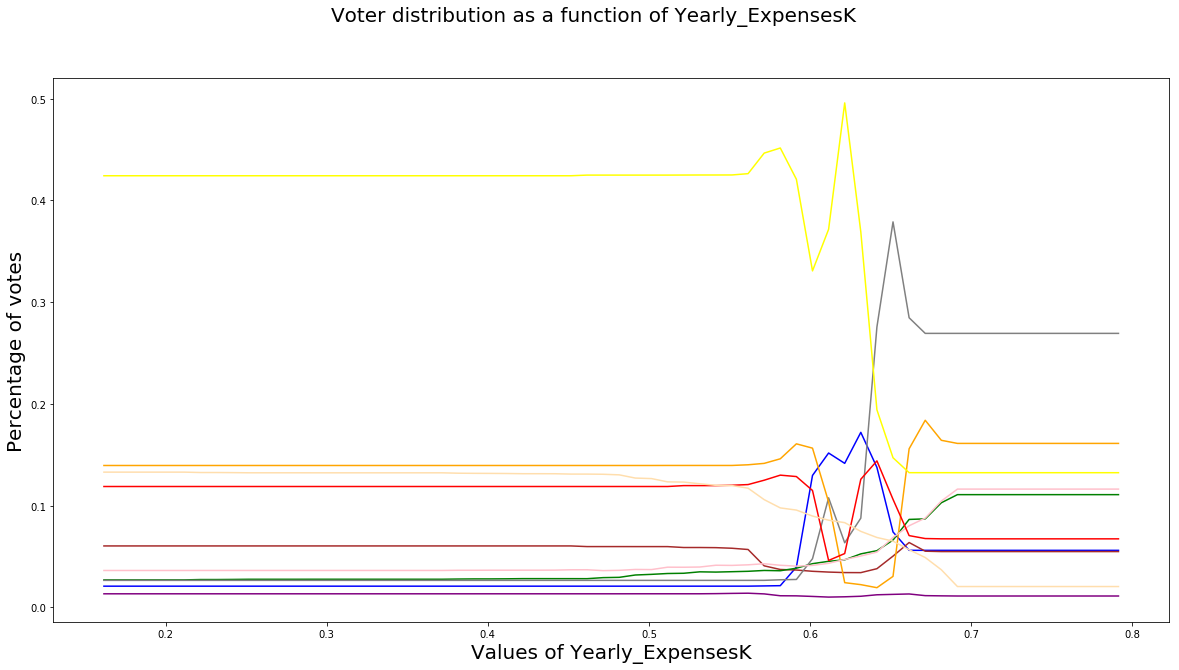

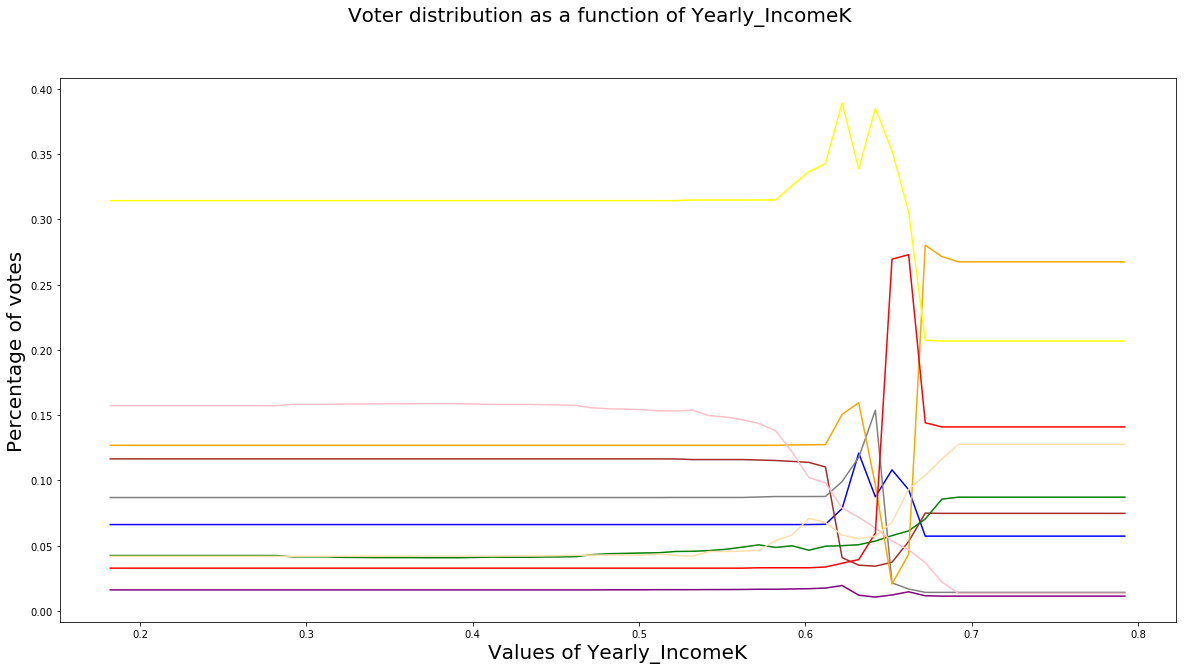

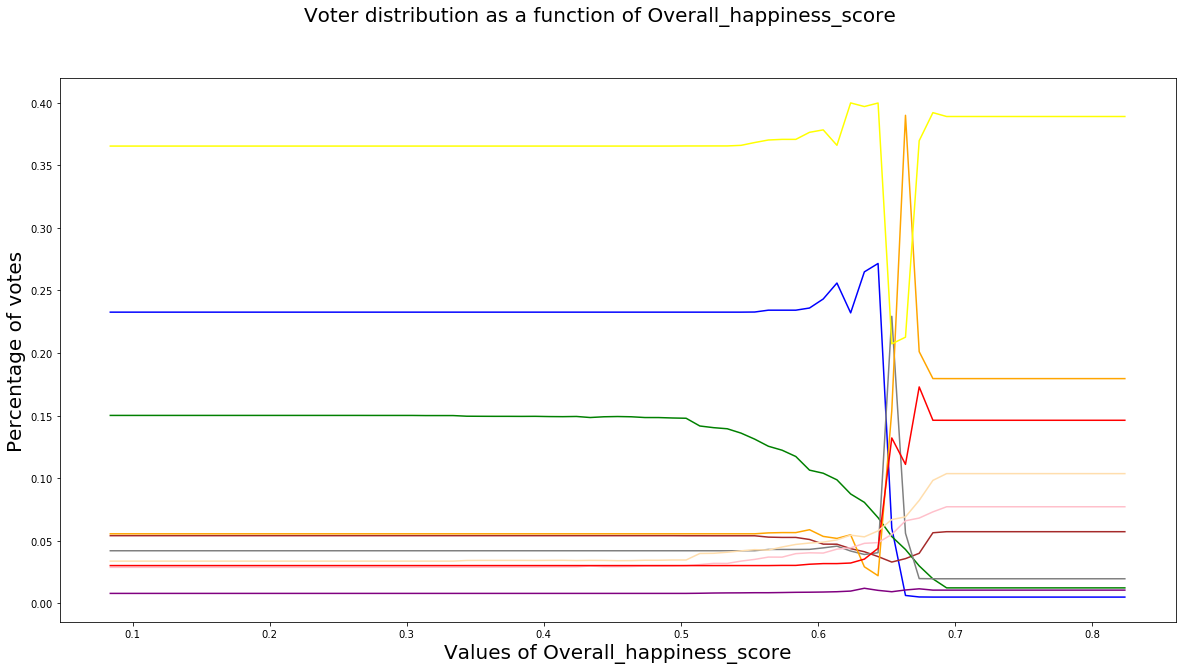

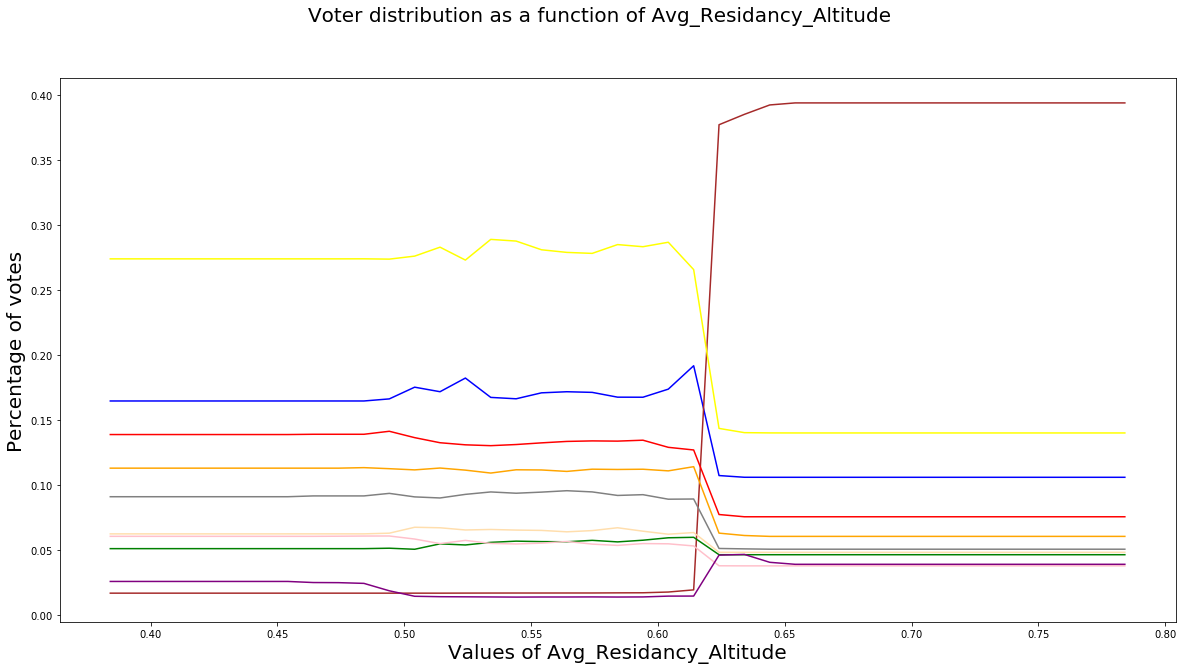

In [20]:
for attr in ['Yearly_ExpensesK','Yearly_IncomeK','Overall_happiness_score','Avg_Residancy_Altitude']:
    manipulate_data(clf,test_data,attr,upper_margin=0.1)

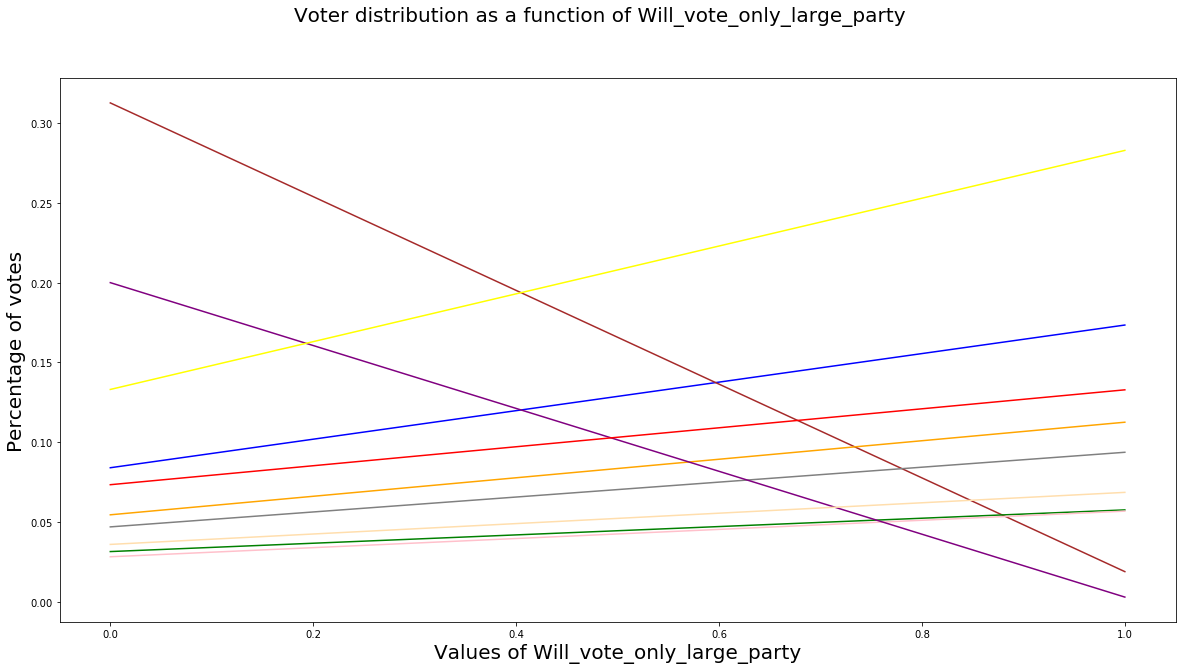

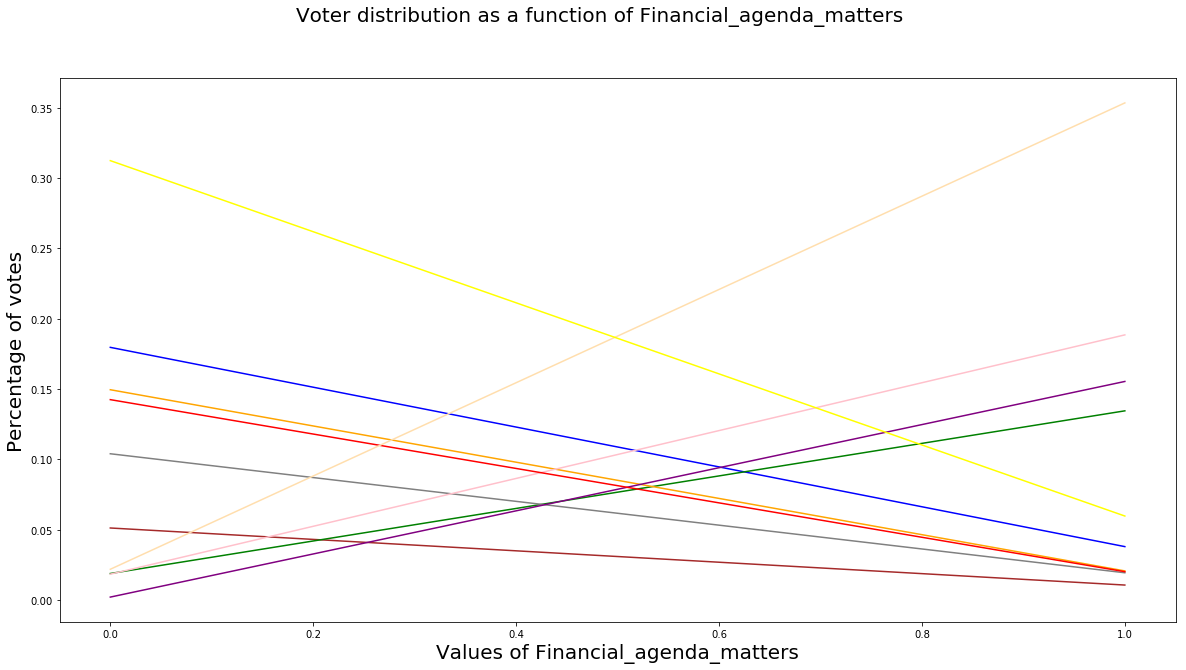

In [21]:
for attr in ['Will_vote_only_large_party','Financial_agenda_matters']:
    manipulate_data(clf,test_data,attr,step_size=1)

### Most Important Issue

We've tried the same thing for Most Important Issue but had problems graphing it.
We wanted to have 8 bar graphs (one for each most important issue), stacked with the votes.

The code works. Only the graphing does not... Maybe we could pie-chart it or something..

The idea was to zero the one-hot vectors and then set every instance in the test set to have the same "most important issue", plot the vote distribution, reset the vectors and repeat with a different issue.

In [22]:
def manipulate_most_important_issue(clf,df,verbose=False):
    df_copy = df.copy()
    issues = [a for a in df_copy.columns.values if 'Most_Important_Issue' in a]
    # zero the one-hot vectors
    def reset_most_important_issue():
        for attr in issues:
            for i in df_copy.index.values:
                df_copy[attr][i] = 0
    
    ratios = []

    for attr in issues:
        reset_most_important_issue()
        if verbose:
            print attr
        for i in df_copy.index.values:
                df_copy[attr][i] = 1        
        ratios.append(np.array([single_voter_distribution/df_copy.shape[0] for 
                                single_voter_distribution in 
                                [sum(single_voter_distribution) for 
                                 single_voter_distribution in zip(*clf.predict_proba(df_copy))]]))

    votes_dist = {}
    for i in range(clf.classes_.size):
        for idx in range(len(issues)):
            votes_dist[i] = np.array([party_dist[i] for party_dist in ratios])

    plot_colors = [x[:-1].lower() if x != 'Whites' else 'navajowhite' for x in clf.classes_]
    
    #fig, ax = plt.subplots(figsize=(20, 10))
    #title = 'Voter distribution as a function of ' + attr
    #fig.suptitle(title,fontsize=20)
    #label = 'Values of ' + attr
    #ax.set_xlabel(label,fontsize=20)
    #ax.set_ylabel('Percentage of votes',fontsize=20)
    #for i in range(clf.classes_.size):
    #    ax.plot(kind='bar', stacked=True, color=plot_colors)
    
    #ax.bar(range(len(issues)), issues, stacked=True, align="center",color=plot_colors)
    #plt.xticks(range(len(c)), issues, rotation=30)
    
    #plt.show()

#manipulate_most_important_issue(clf,test_data)

# Conclusions of factor manipulation

* People with high expenses vote for Greys. If everyone had high expenses, they would win.
* People with high incomes vote for Oranges. If everyone had high incomes, Oranges would win.
* People who live high up vote for Browns. If everyone lived in the mountains, Browns would win.
* At a certain range of Overall Happiness Oranges would win, outside of that range, Yellows would win.
* Overall Happiness and Yearly Income affect Blues and Yellows the same. Their graphs are very similar in this regard. When one drops, so does the other. When one rises, so does the other.
* People with high expenses but low incomes vote Pinks
* If everyone cared about the Financial Agenda, Whites would probably win. We saw in the data preparation (in the last exercise, not this one) that Financial Agenda Matters is unevenly distributed, so this could HIGHLY affect the vote results if you could change people's thinking about the financial agenda.
* If no one voted for a large party then browns would win, which would make them a large party, which means no one would vote for them.. but this part disregards any semantic meanins in the features.

And many, many more. The graphs tell a big story

# "One size fits all"

Lets try different classifiers for different problems.

### Voter Distribution

In this case, we don't care if people were classified correctly, we only care about how good the sum of the votes is.

For this, we will use the L1 norm between the actual distribution and the predicted distribution, in order to measure how good a classifier is.

We will tweak our pick_best_classifier function from above to instead measure by the L1 score and return the classifier with the lowest score.

iteration: 1
iteration: 2
iteration: 3
iteration: 4
Best classifier: Random Forest with score: 38


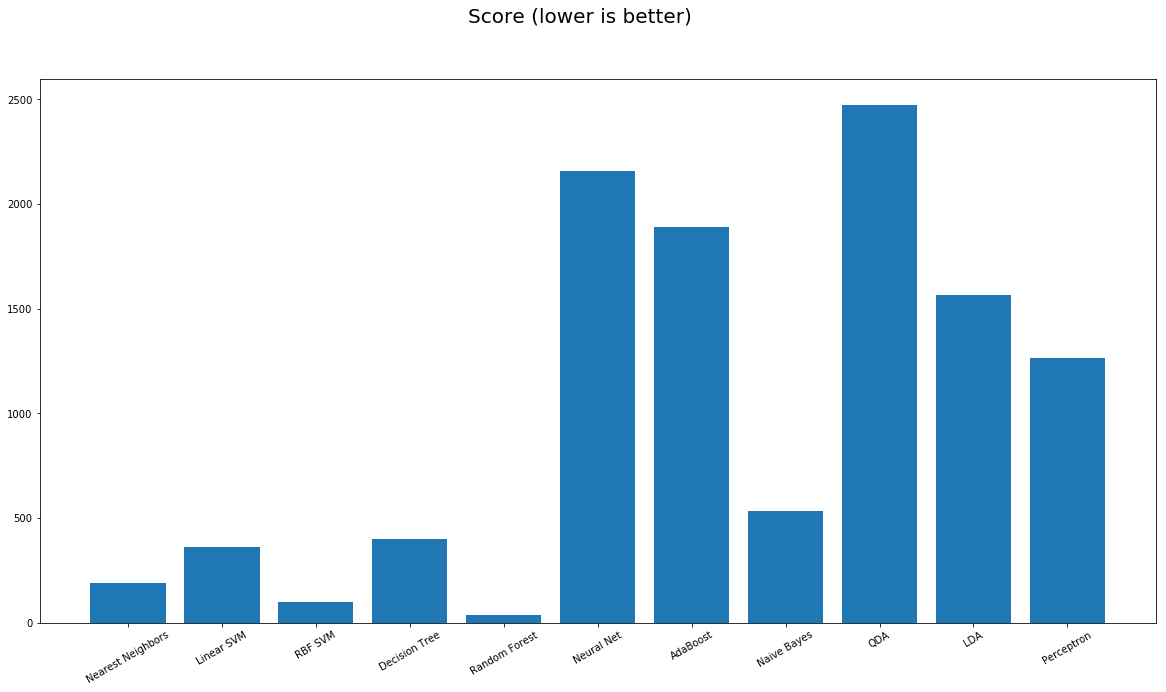

In [37]:
def pick_best_classifier2(classifiers, names, df,fn,number_of_iterations=1,graph_res=False, verbose=False):
    data = df.drop(['Vote'],axis=1)
    data_labels = df['Vote']
 
    best_score = df.shape[0]*2
    best_clf = None
    best_clf_name = None
    best_errors = []
    for i in range(number_of_iterations):
        if number_of_iterations > 1:
            print "iteration:",i+1
            
        X_train, X_test, Y_train, Y_test = train_test_split(data,data_labels)
        errors = []
        update = False
        for name, clf in zip(names, classifiers):
            clf.fit(X_train, Y_train)
            prediction = clf.predict(X_test)
            score = fn(clf.classes_,Y_test, prediction)
            errors.append(score)
            if verbose:
                print "current classifier:", name
                print name, "L1 score:", score
            if score < best_score:
                best_clf = clf
                best_score = score
                best_clf_name = name
                update = True
        if update:
            best_errors = errors
        if verbose:
            print ""
    print "Best classifier:", best_clf_name, "with score:", best_score
    if graph_res:
        f, ax = plt.subplots(figsize=(20, 10))
        f.suptitle('Score (lower is better)',fontsize=20)
        ax.bar(range(len(names)), errors)
        plt.xticks(range(len(names)), names, rotation=30)
        plt.show()
    return best_clf
    
    
#try them all!!! our classifiers, with our parameters are in there
#but since this is automatic, let's just try them all and let the best one win!
classifiers = [
    KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree'),
    SVC(kernel="linear", C=1000000),
    SVC(gamma=5, C=1000000),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(n_estimators = 60,criterion='gini',n_jobs=-1),
    MLPClassifier(alpha=1e-5, hidden_layer_sizes=(5,2)),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LinearDiscriminantAnalysis(),
    Perceptron()]

names = ["Nearest Neighbors",
         "Linear SVM",
         "RBF SVM",
         "Decision Tree",
         "Random Forest",
         "Neural Net",
         "AdaBoost",
         "Naive Bayes",
         "QDA",
         "LDA",
         "Perceptron"]

def L1(classes,actual,predicted):
    c = Counter()
    for i in range(len(predicted)):
        c[predicted[i]] += 1
    values_actual = actual.value_counts()
    return sum(abs(values_actual[cls]-c[cls]) for cls in classes)

clf2 = pick_best_classifier2(classifiers, names, train, L1, 4, graph_res=True, verbose=False)

# Well.. Random Forest still wins

The best classifier, by far is still the Decision Tree. I'm so certain in this that I've "hard coded" the words "Random Forest" into this paragraph.

When we ran cross validation, Random Forest was wrong with an L1 distance, our measurement of error, of only 38!

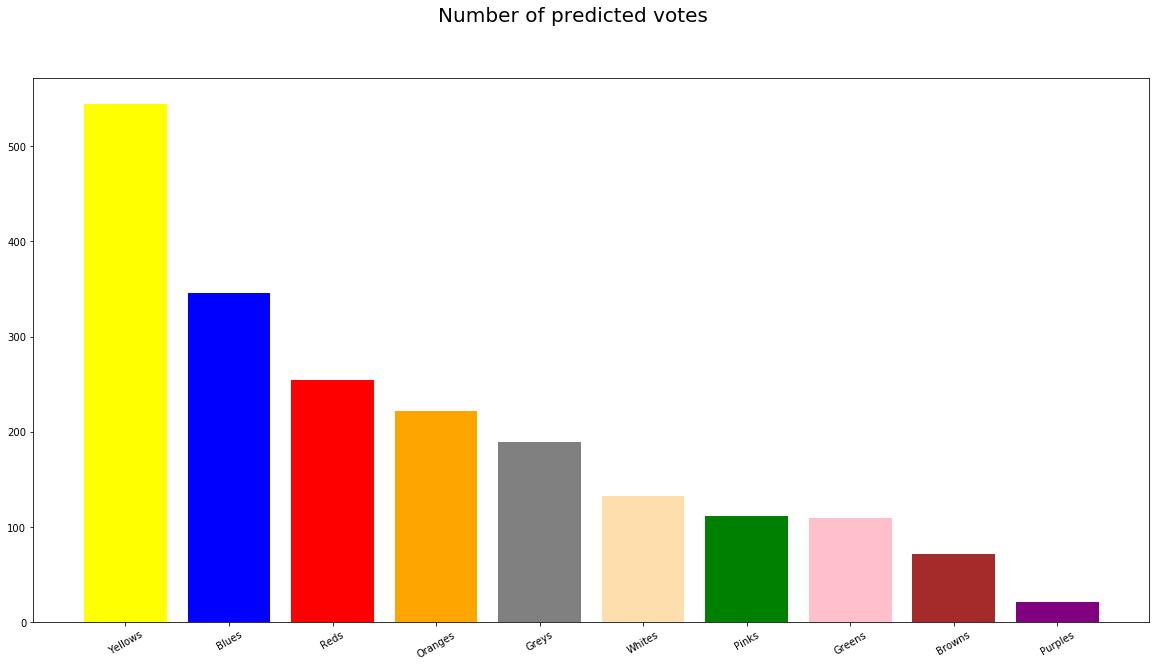

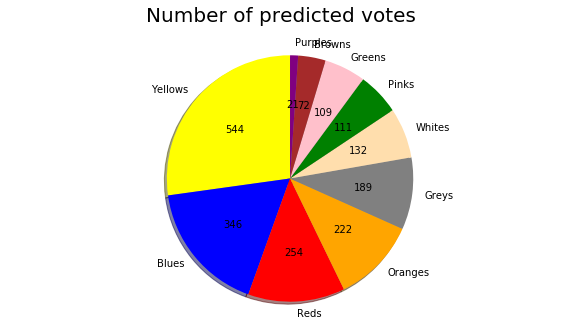

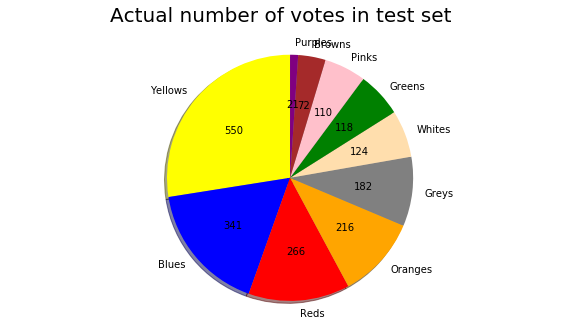

In [38]:
#Fit to the training set and predict on the test set
train_data = train.drop(['Vote'],axis=1)
train_data_labels = train['Vote']

test_data = test.drop(['Vote'],axis=1)
test_labels = test['Vote']

predictions = clf2.predict(test_data)

c = Counter()
for i in range(len(predictions)):
    c[predictions[i]] += 1
    
c = c.most_common()
parties, votes = zip(*[x for x in c])

f, ax = plt.subplots(figsize=(20, 10))
f.suptitle('Number of predicted votes',fontsize=20)
ax.bar(range(len(c)), [x[1] for x in c], align="center",color=colors)
plt.xticks(range(len(c)), parties, rotation=30)

fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.pie([x[1] for x in c], labels=parties, colors=colors, autopct=lambda(p): '{:.0f}'.format(p * predictions.size / 100),
        shadow=True, startangle=90)
ax1.axis('equal')
fig1.suptitle('Number of predicted votes',fontsize=20)



c = Counter()
for i in range(len(test_labels.values)):
    c[test_labels.values[i]] += 1
    
c = c.most_common()
parties, votes = zip(*[x for x in c])


fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.pie([x[1] for x in c], labels=parties, colors=colors, autopct=lambda(p): '{:.0f}'.format(p * predictions.size / 100),
        shadow=True, startangle=90)
ax1.axis('equal')
fig1.suptitle('Actual number of votes in test set',fontsize=20)



plt.show()